# Customer Segmentation Recommendation

# Dataset : Purchase at Supermarket

# # Attributes
1. Customer_ID
2.AVG_Actual_price_12
3.Purchase_Value
4.No_of_Items
5.Total_Discount
6.MONTH_SINCE_LAST_TRANSACTION

# Problems Definition

Customer Segmentation and recommendation based on the given attributes

# Import Dataset

In [38]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn  import cross_validation
from sklearn.cross_validation import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline



In [33]:
path='C:/MyDocuments/MyDcuments/Personal/DataScience/My/UPX/Machine Learning/Projects/Customer Segmentation _ Recommendation'
df=pd.read_csv(path+'/Supermarket Purchase.csv')

df.head()
df.tail()
df.info()
df.describe()
df.isnull().any().any()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
697,1002,2210.000,8840.00,4,11960.00,1
698,1003,2500.000,2500.00,1,0.00,5
699,1004,347.045,694.09,2,605.91,12
700,1005,3750.000,3750.00,1,3750.00,12
701,1006,4150.000,4150.00,1,4150.00,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


False

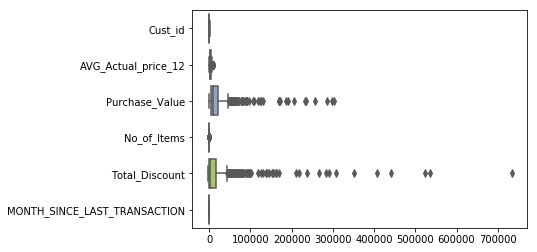

In [34]:
sns.boxplot(data=df, orient="h", palette="Set2")

# Data Cleanup and Wrangling

In [35]:
# Drop customer id as it would not give any insight 
df.drop('Cust_id',axis=1, inplace=True)

# Data Prepeartion 

,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.262629,0.065336,0.056847,0.033548,0.366356
std,0.188338,0.114445,0.117183,0.079137,0.323895
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.121899,0.013728,0.005848,0.005367,0.090909
50%,0.208218,0.028463,0.017544,0.008887,0.272727
75%,0.368579,0.069883,0.052632,0.028980,0.636364
max,1.000000,1.000000,1.000000,1.000000,1.000000


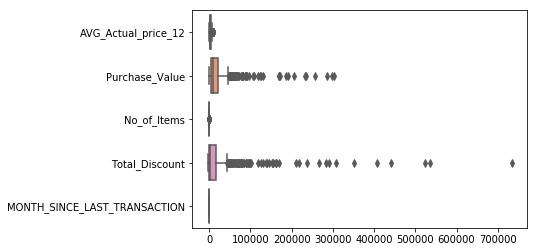

In [56]:
# Data scale standardization needs to be done for distance based models
scale=MinMaxScaler(feature_range=(0,1))
df_scaled=pd.DataFrame( scale.fit_transform(df))
df_scaled.columns=df.columns;
df_scaled.describe()


In [41]:
# Train Test Split
xtrain,xtest=train_test_split(df_scaled,test_size=.5)

# Clustering using KMeans



In [54]:
from scipy.spatial.distance import cdist
cluster=range(2,9)
error=[]

for k in cluster:
    kmeans=KMeans(k)
    kmeans.fit(xtrain)
    clusassign=kmeans.predict(xtrain)
    error.append(kmeans.inertia_/100)
    
df_clust=pd.DataFrame({"No_of_Cluster":cluster,"SSE":error })    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Number of clusters')

Text(0,0.5,'SSE')

Text(0.5,1,'Selecting k with the Elbow Method')

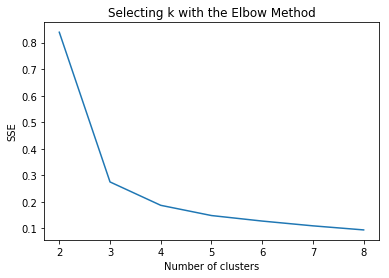

In [55]:
plt.plot(cluster, error)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Selecting k with the Elbow Method') # pick the fewest number of clusters that reduces the average distance

In [47]:
kmeans=KMeans(3)
kmeans.fit(xtrain)
labels=kmeans.predict(xtrain)
kmeans.inertia_

features=xtrain.columns
xtrain["cluster"]=labels
xtrain.pivot_table(features, index='cluster',aggfunc='mean')
xtrain.pivot_table(features, index='cluster',aggfunc='count')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

32.332934175190822

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,AVG_Actual_price_12,MONTH_SINCE_LAST_TRANSACTION,No_of_Items,Purchase_Value,Total_Discount
cluster,,,,,
0,0.209612,0.700284,0.060581,0.059147,0.030592
1,0.178628,0.126430,0.073700,0.074625,0.038292
2,0.557535,0.212121,0.010071,0.045378,0.008063


,AVG_Actual_price_12,MONTH_SINCE_LAST_TRANSACTION,No_of_Items,Purchase_Value,Total_Discount
cluster,,,,,
0,128,128,128,128,128
1,151,151,151,151,151
2,72,72,72,72,72


# Clustering on Test Data

In [49]:
kmeans=KMeans(3)
kmeans.fit(xtest)
labels=kmeans.predict(xtest)
kmeans.inertia_

features=xtest.columns
xtest["cluster"]=labels
xtest.pivot_table(features, index='cluster',aggfunc='mean')
xtest.pivot_table(features, index='cluster',aggfunc='count')
      

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

41.179966519416624

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,AVG_Actual_price_12,MONTH_SINCE_LAST_TRANSACTION,No_of_Items,Purchase_Value,Total_Discount
cluster,,,,,
0,0.518954,0.225175,0.021862,0.069414,0.009470
1,0.165583,0.143574,0.075418,0.067117,0.041748
2,0.231759,0.693101,0.056323,0.067486,0.046830


,AVG_Actual_price_12,MONTH_SINCE_LAST_TRANSACTION,No_of_Items,Purchase_Value,Total_Discount
cluster,,,,,
0,65,65,65,65,65
1,145,145,145,145,145
2,141,141,141,141,141


# Interpretation of result

In [ ]:
The clusters generated on traning data seems similar to the clusters created on test data